In [1]:
#Post pruning method

import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
df=pd.read_csv("/content/wines.csv")
df.head()

,Class,Alcholol,Malic acid,Ash,Alcanity,Magnesium,Total Phenol,Flavanoids,N Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


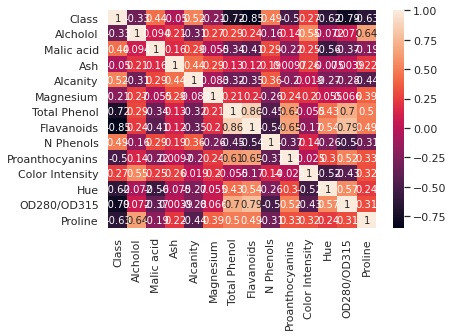

In [2]:
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
#explain the correalation of one varibale with the other 

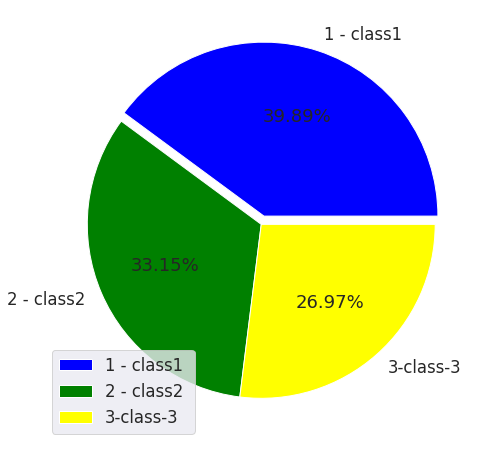

In [6]:
plt.figure(figsize=(8,8))
pieC = df['Class'].value_counts()
explode = (0.05, 0,0)
colors = ['blue', 'green','yellow']
labels = ['1 - class1 ', '2 - class2','3-class-3']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('1 - class1 ', '2 - class2','3-class-3'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')
#pie char shows the percent of no of people present in each class

In [33]:

#there are 178 rows and 13 columns 
X = df.drop(columns=['Class'])
y = df['Class']
print(X.shape)
print(y.shape)







(178, 13)
(178,)


In [22]:
y=df[['Class']]
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [34]:
"""X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)"""
#We will rebuild a new tree by using above data and see how it works by tweeking the parameteres
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)


(133, 13)
(45, 13)


In [72]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


In [42]:

clf = tree.DecisionTreeClassifier(random_state=0)






In [43]:
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

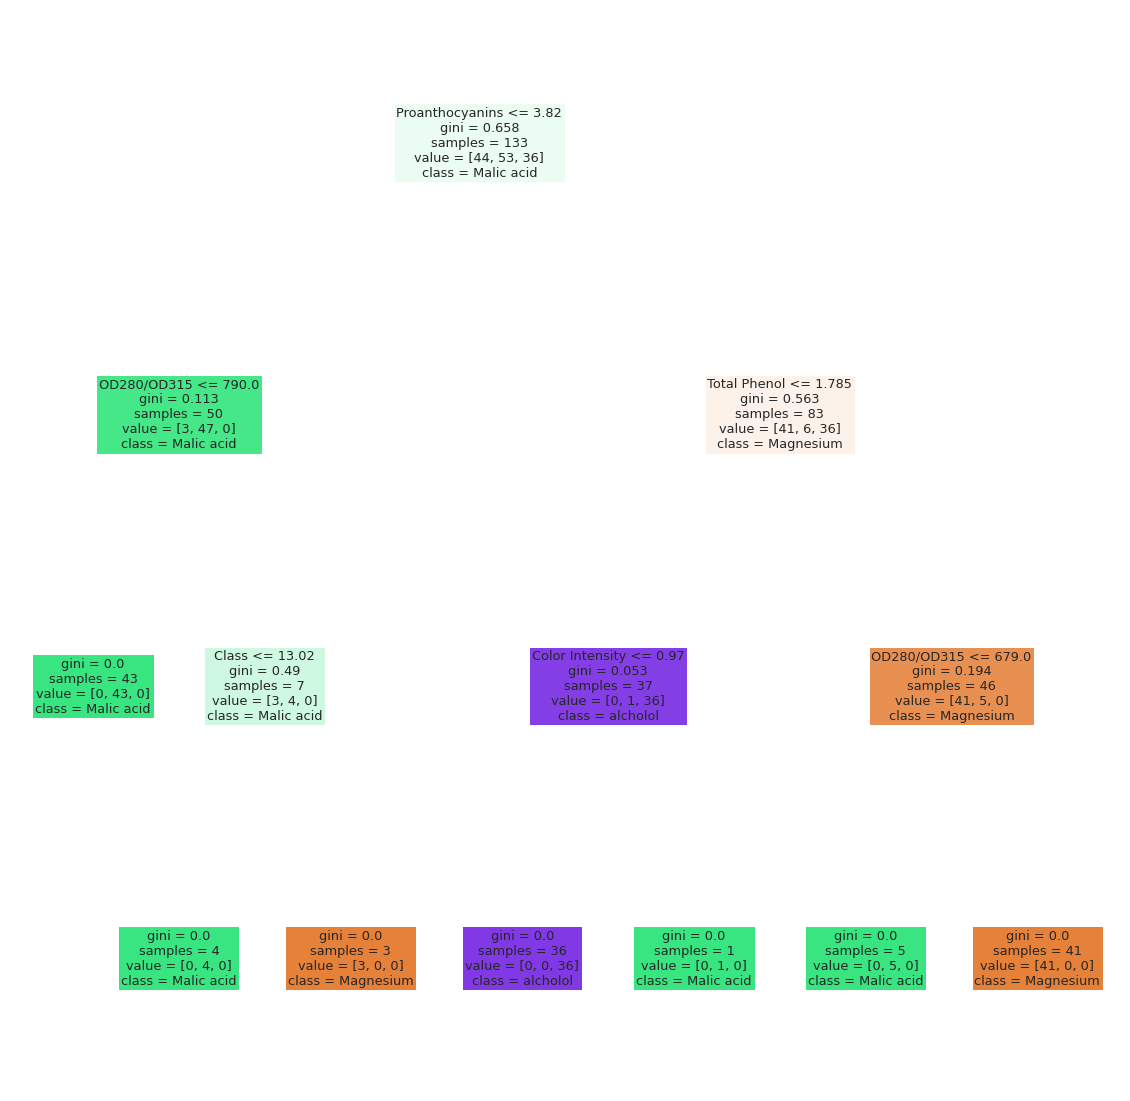

In [45]:

plt.figure(figsize=(20,20))
features = df.columns
classes = ['Magnesium','Malic acid','alcholol']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()


In [52]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.9555555555555556
Train Confusion matrix


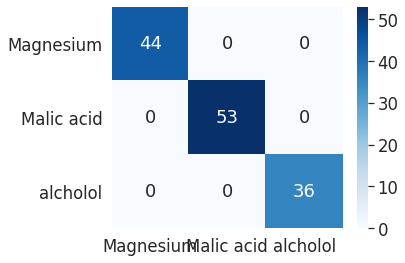

Test Confusion matrix


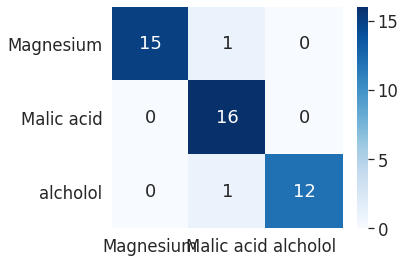

In [56]:

from sklearn.metrics import accuracy_score,confusion_matrix

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')



[Text(141.64615384615385, 190.26, 'X[9] <= 3.82\ngini = 0.658\nsamples = 133\nvalue = [44, 53, 36]'),
 Text(51.50769230769231, 135.9, 'X[12] <= 790.0\ngini = 0.113\nsamples = 50\nvalue = [3, 47, 0]'),
 Text(25.753846153846155, 81.53999999999999, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(77.26153846153846, 81.53999999999999, 'X[0] <= 13.02\ngini = 0.49\nsamples = 7\nvalue = [3, 4, 0]'),
 Text(51.50769230769231, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(103.01538461538462, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(231.7846153846154, 135.9, 'X[6] <= 1.785\ngini = 0.563\nsamples = 83\nvalue = [41, 6, 36]'),
 Text(180.27692307692308, 81.53999999999999, 'X[10] <= 0.97\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(154.52307692307693, 27.180000000000007, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]'),
 Text(206.03076923076924, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(283.29230

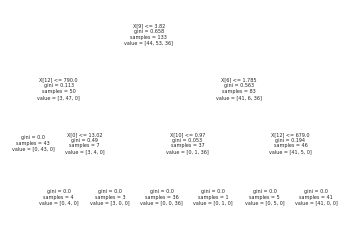

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree.plot_tree(clf)

In [75]:
"""from the train confusion matrix its clear that the training data is precicted 100% true
from the test confuson mateix its clear that the testing data score is around 0.955 that is around 0.5 is predicted wrong 
from the data there are many datasets of class A. 
Accuracy score increases on optimizing the data.
following is done by post purning method where Post-pruning (or just pruning) is the most common way of 
simplifying trees. Here, nodes and subtrees are replaced with leaves to improve complexity. Pruning 
can not only significantly reduce the size but also improve the classification accuracy of unseen objects. """


'from the train confusion matrix its clear that the training data is precicted 100% true\nfrom the test confuson mateix its clear that the testing data score is around 0.955 that is around 0.5 is predicted wrong \nfrom the data there are many datasets of class A. \nAccuracy score increases on optimizing the data.\nfollowing is done by post purning method where Post-pruning (or just pruning) is the most common way of \nsimplifying trees. Here, nodes and subtrees are replaced with leaves to improve complexity. Pruning \ncan not only significantly reduce the size but also improve the classification accuracy of unseen objects. '